In [87]:
%matplotlib inline
%matplotlib widget
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import numpy as np

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [8]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station 

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
least_recent_date = df['Date'].min()
least_recent_date

Timestamp('2016-08-23 00:00:00')

In [37]:
# Find the most recent date in the data set
df['Date'] = pd.to_datetime(df['Date'])
recent_date = df['Date'].max()
recent_date

Timestamp('2017-08-23 00:00:00')

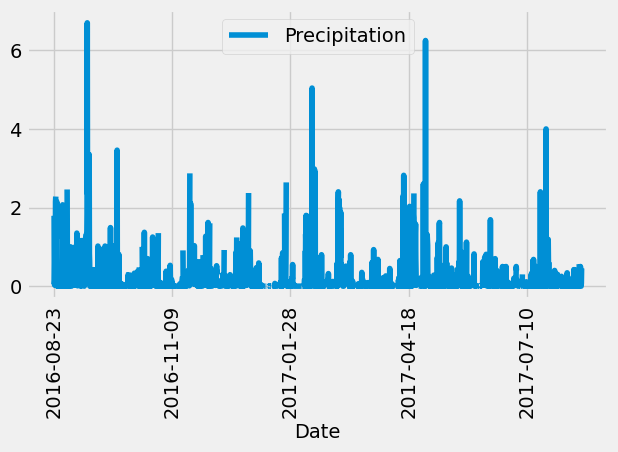

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).filter(measurement.date>=prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(scores, columns =["Date", "Precipitation"]).sort_values("Date",ascending=True) 

# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(x='Date', y='Precipitation', rot=90)
plt.tight_layout()
plt.savefig("./Images/Precipitation.png")
plt.show()

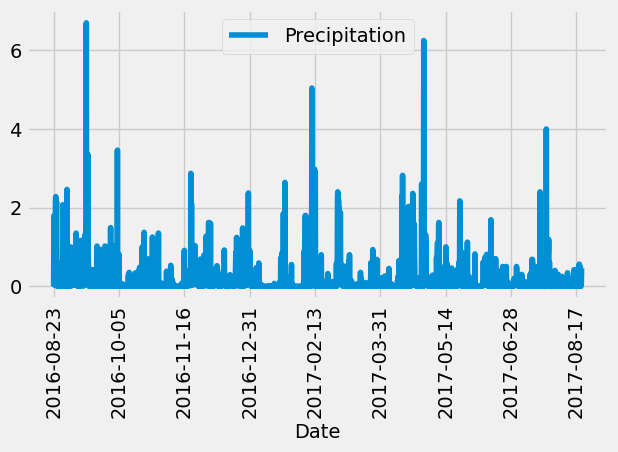

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).filter(measurement.date>=prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(scores, columns =["Date", "Precipitation"]).sort_values("Date",ascending=True).dropna()

# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(x='Date', y='Precipitation', rot=90)
plt.tight_layout()
plt.savefig("./Images/Precipitation2.png")
plt.show()


In [66]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [67]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data = active_stations[0][0]
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == temp_data).all()

[(54.0, 85.0, 71.66378066378067)]

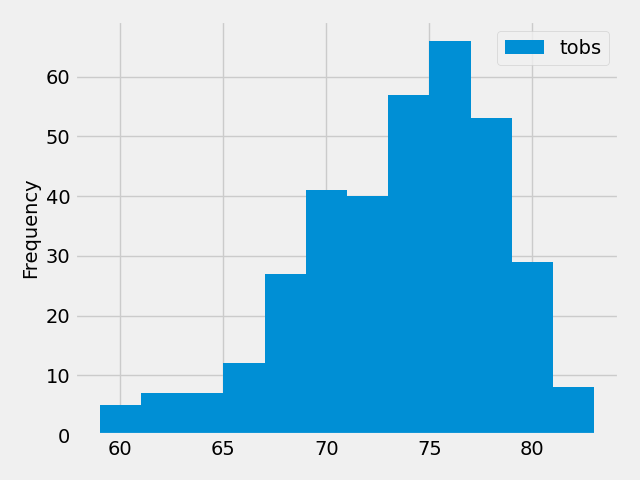

In [126]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement.tobs).filter(measurement.station == "USC00519281").\
    filter(measurement.date >= prev_year).all()
tobs_df = pd.DataFrame(tobs, columns = ["tobs"])
tobs_df.plot.hist(bins = 12)
plt.xlabel =('Temperature')
plt.tight_layout()
plt.savefig('./Images/Tobs')
plt.show()

In [120]:
tobs_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


# Close Session

In [125]:
# Close Session
session.close()